In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")

In [3]:
data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [4]:
data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [7]:
data.shape

(803, 11)

In [11]:
data['PoliticalParty'].value_counts()


Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

In [14]:
data['Filed in 2017'].value_counts()

1    407
0    396
Name: Filed in 2017, dtype: int64

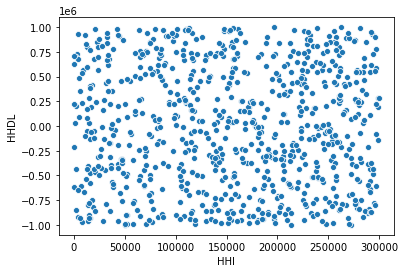

In [12]:
ax = sns.scatterplot( x = 'HHI', y = 'HHDL',data = data, ci = None)

In [15]:
data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [16]:
pd.get_dummies(data.PoliticalParty)

,Democrat,Independent,Republican
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
798,1,0,0
799,1,0,0
800,1,0,0
801,0,0,1


In [17]:
#store data frame one hot coding
dummies = pd.get_dummies(data.PoliticalParty)


In [18]:
#concat dataframe
merged = pd.concat([data,dummies],axis='columns')
merged

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty,Democrat,Independent,Republican
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat,1,0,0
1,501,129786,700251,2,5,63,3,0,0,0,Republican,0,0,1
2,658,268343,493411,2,4,44,1,1,0,1,Independent,0,1,0
3,703,290506,-433408,1,1,28,5,1,0,1,Republican,0,0,1
4,702,90108,907135,1,3,57,5,1,1,0,Democrat,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat,1,0,0
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat,1,0,0
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat,1,0,0
801,561,123721,-51448,2,0,23,4,0,1,1,Republican,0,0,1


In [26]:
#drop columns

final = merged.drop(['PoliticalParty','Independent',], axis='columns')
final

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,Democrat,Republican
0,61,183414,-12402,1,2,28,1,0,0,1,1,0
1,501,129786,700251,2,5,63,3,0,0,0,0,1
2,658,268343,493411,2,4,44,1,1,0,1,0,0
3,703,290506,-433408,1,1,28,5,1,0,1,0,1
4,702,90108,907135,1,3,57,5,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,1,0
799,657,136652,-184616,1,2,31,3,1,0,0,1,0
800,596,51066,-900262,1,1,67,4,0,0,0,1,0
801,561,123721,-51448,2,0,23,4,0,1,1,0,1


In [20]:
data.shape

(803, 11)

In [29]:
X = data.drop("PoliticalParty",axis=1)
y = data["PoliticalParty"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression




In [35]:
logmodel=LogisticRegression()

In [36]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [41]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n    Democrat       0.50      0.42      0.46        55\n Independent       0.32      0.35      0.33        55\n  Republican       0.27      0.29      0.28        51\n\n    accuracy                           0.35       161\n   macro avg       0.36      0.35      0.36       161\nweighted avg       0.37      0.35      0.36       161\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,predictions)

array([[23, 19, 13],
       [ 9, 19, 27],
       [14, 22, 15]])

In [50]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,predictions)

0.35403726708074534